In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from scipy.misc import derivative

In [3]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x) + 1/2*np.sin(np.exp(x)) + x

In [4]:
x = np.linspace(-7,5,10000)
X, Y = x, function(x)

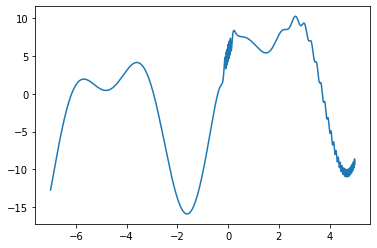

In [5]:
plt.plot(X, Y)

The following algorithm is supposed to iteratively find the minimum of a function. 

What problem does it have?

In [12]:
import matplotlib.cm as cm
x = X
index = np.random.randint(0, len(x)) # randomly select an index to sample a point
point = x[index] # sample a point to start
derivative_in_point = derivative(function, point)
it = 0 # current iteration
max_it = 100 # set the max number of iterations to avoid infinite loops
points = [] # list of the points we have inspected
threshold = 0.01 # instead for waiting till we reach the 0 of the derivative, put a threshold
while np.abs(derivative_in_point)> 0.01 and it<max_it: 
    if derivative_in_point < 0: # the slope is negative
        X = x[index:] # since the slope is negative, the local minimum should be on the right
        index = np.random.randint(0, len(x)) # randomly select an index
        point = x[index] # sample the next point in the new interval
        points.append(point) # store for later
        derivative_in_point = derivative(function, point) # compute the derivative in the new point
    else:
        X = x[0:index+1] # the slope is positive, so the minimum should be on the left
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1
plt.figure()
plt.plot(X,Y)
plt.scatter(np.array(points), function(np.array(points)), c=range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


NameError: name 'X' is not defined

## Exercise

1. Can you make the algorithm above to be implemented into a fuction `gradient_descent(function, X, max_it)`?

2. Run the experiment multiple times: do you notice any important difference at each iteration?

## Integral

Scipy library also offers the possibility to compute the integral of a function.

In addition, the method `plt.fill_between(section, function(section)` colors the area under the curve of a generic function. 

Search the documentation of both and compute the area under the curve of the functions in the given intervals of the following exercises and plot them.



### Example

interval = \[2,5\]

Function f(x) = x


In [5]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

More in https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html .

In [8]:
area_under_the_curve = result[0]

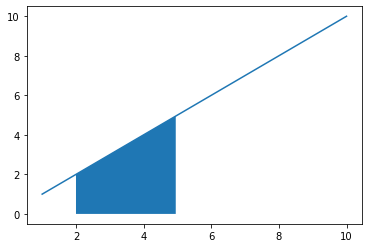

In [13]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))


1. interval = \[2,5\]

Function f(x) = 5

Compare the result computing the area by hand. Does it make sense?

Be careful: defining a constant function, you may end up with a single number instead of an array of the same size of the input. For this, I recommend to put in your function `constant_value*np.ones_like(x)`.

In [19]:
a,b = [2,5]
def fi(x):
    return 5*np.ones_like(x)

res0 = integrate.quad(fi, a, b)
print(res0) 
area_under_the_curve = res0[0]
print(area_under_the_curve)

(0.9162907318741551, 1.0172870677773229e-14)
0.9162907318741551


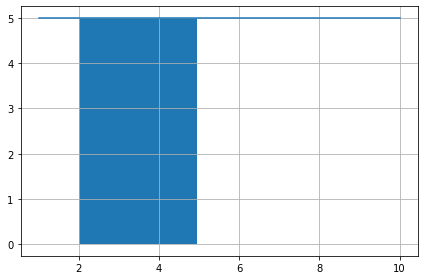

In [69]:
x = np.linspace(1,10, 100)
section = np.arange(2, 5, 1/20)
plt.plot(x, fi(x))
plt.fill_between(section,fi(section))
plt.grid()
plt.tight_layout()
plt.show()

2. interval = \[-1,1\]

Function f(x) = 1/x

In [41]:
a,b = [-1,1]


def func0(x):
    c = np.divide(1, x, where=x!=0)
    return c

    

res = integrate.quad(func0,a,b)
res

(1.0389614678684e-310, 5.503777059140336e-14)

In [52]:
area_under_the_curve = res[0]
print(area_under_the_curve)

1.0389614678684e-310


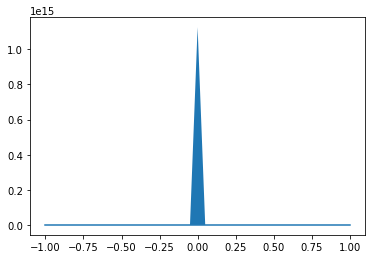

In [53]:
x = np.linspace(-1,1,10)
section = np.arange(-1, 1, 1/20)
plt.plot(x, func0(x))
plt.fill_between(section,func0(section))

2. interval = \[-pi,pi\]

Function f(x) = sin(x)

In [11]:
a, b  = [-np.pi,np.pi]
def func(x):
    return np.sin(x)

ans = integrate.quad(func, a, b)
ans

(0.0, 4.3998892617846e-14)

In [12]:
area_under_the_curve = ans[0]
print(area_under_the_curve)

0.0


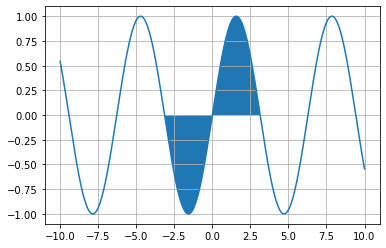

In [13]:
x = np.linspace(-10,10, 1000)
section = np.arange(-np.pi, np.pi, 1/20)
plt.plot(x, func(x))
plt.fill_between(section,func(section))
plt.grid()
plt.show()

3. interval = \[-pi,pi\]

Function f(x) = cos(x)


In [14]:
a,b = [-np.pi, np.pi]
def f(x):
    return np.cos(x)
result3 = integrate.quad(f,a,b)
result3    

(2.615901373506474e-16, 4.471737093238828e-14)

In [15]:
area_under_the_curve = result3[0]
print(area_under_the_curve)

2.615901373506474e-16


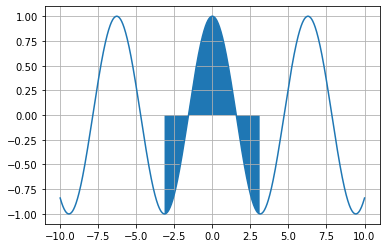

In [16]:
x = np.linspace(-10,10, 1000)
section = np.arange(-np.pi, np.pi, 1/20)
plt.plot(x, f(x))
plt.fill_between(section,f(section))
plt.grid()
plt.show()

2. interval = \[-pi,pi\]

Function f(x) = sin(x) - cos(2x)

In [17]:
a, b = [-np.pi, np.pi]
def func2(x):
    return np.sin(x)-np.cos(2*x)
result4 = integrate.quad(func2, a, b)   
result4 

(5.231802747012948e-16, 4.085699506880975e-09)

In [18]:
area_under_the_curve = result4[0]
print(area_under_the_curve)

5.231802747012948e-16


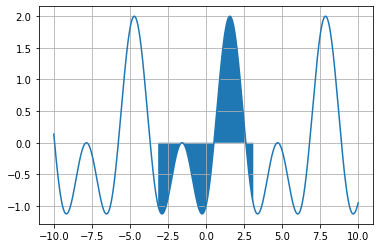

In [19]:
x = np.linspace(-10,10, 1000)
section = np.arange(-np.pi, np.pi, 1/20)
plt.plot(x, func2(x))
plt.fill_between(section,func2(section))
plt.grid()
plt.show()